In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'similarity_matrix_combined_vhpc'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'compute_similarity_matrix_across', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [6]:
from itertools import product

In [8]:
expo_animals = '94', '96', '98', '99', '100', '104', 'vNAc7' #c18m9 excluded due to only 14 trials of one of the odors
pre_animals =  '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
post_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
post_hiatus_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
all_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'

In [9]:
delta_t05s = 0.5
t_start05s = -5.5 
t_stop05s = 10.5

delta_t1s = 1
t_start1s = -5 
t_stop1s  = 11 

In [10]:
sessions = 'expo','pre','post','post_hiatus'
comparison_labels='CS1','CS2','CS3','CS4'
#only going to analyze .5s and 1s bins here to save time.
bins = ['05s','1s']
bin_ranges=[]
for tb in bins:
    if tb == '05s':
        div=0.5
    else:
        div=tb[:-1]
            #print range(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div))))
    #for t in range(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div)))):
    bin_ranges.append(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div))))
print bin_ranges

[32, 16]


In [11]:
for tb in bins:
    for sess in sessions:
        try:
            exec("patterns_%s_%s = dict(zip(%s_animals, [ut.load_variable('patterns_evs_%s_%s',\
                                                               '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                      for ani in %s_animals]))"%(tb,sess,sess,tb,sess,sess))
            exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                             '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                      for ani in %s_animals]))"%(sess,sess,sess,sess))
        except:
            print 'nope %s %s'%(tb,sess)

#load patterns extracted for each time bin from the decoding nb
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew':

    exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

## compare similarity across time bins (tb)

#combine cells and patterns across animals
#combined for each tb should = 120xall cells
for sess in sessions:
    #exec("combined_labels_%s=[]"%sess)
    #for ani in eval("%s_animals"%sess):
    #    exec("combined_labels_%s.extend(np.where(labels_%s[ani]==0))"%(sess,sess))
    #    num_trials = len(eval("patterns_tb_%s[ani][0]"%sess))
    for tb in range(16):
        for odor,trial in zip(['CSp','CSm'],[0,1]):
            exec("combined_patterns_tb_%s_%s_%s=[]"%(tb,sess,odor))
            exec("combined_patterns_tb_%s_%s_%s = np.concatenate(([patterns_tb_%s[ani][tb][labels_%s[ani]==trial]\
                  for ani in %s_animals]),axis=1)"%(tb,sess,odor,sess,sess,sess))


In [12]:
#combine cells and patterns across animals
#combined for each tb should = 120xall cells
for sess in sessions:
    for tb,i in zip(bins,range(len(bins))):
        for t in range(bin_ranges[i]):
            for odor,trial in zip(comparison_labels,[1,2,3,4]):
                exec("combined_patterns_%s_%s_%s_%s=[]"%(tb,sess,t,odor))
                exec("combined_patterns_%s_%s_%s_%s = np.concatenate(([patterns_%s_%s[ani][t][labels_%s[ani]==trial]\
                  for ani in %s_animals]),axis=1)"%(tb,sess,t,odor,tb,sess,sess,sess))


#this will get correlations for each animal individually
odors= 'CSp','CSm'
tbs = range(16)
pattern_ids_expo = ['tb%s_%s_expo'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_pre =  ['tb%s_%s_pre'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_post = ['tb%s_%s_post'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_ext1 = ['tb%s_%s_ext1'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_ext2 = ['tb%s_%s_ext2'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_renew =['tb%s_%s_renew'%(tb,odor) for tb, odor in product(tbs, odors)]


all_patterns_expo = [eval('combined_patterns_tb_%s_expo_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_expo, all_patterns_expo)
across_tb_res_expo=corrmat_distr
print 'expo DONE!',

all_patterns_pre = [eval('combined_patterns_tb_%s_pre_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_pre, all_patterns_pre)
across_tb_res_pre=corrmat_distr
print 'pre DONE!',


all_patterns_post = [eval('combined_patterns_tb_%s_post_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_post, all_patterns_post)
across_tb_res_post=corrmat_distr
print 'post DONE!',


all_patterns_ext1 = [eval('combined_patterns_tb_%s_ext1_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_ext1, all_patterns_ext1)
across_tb_res_ext1=corrmat_distr
print 'ext1 DONE!',


all_patterns_ext2 = [eval('combined_patterns_tb_%s_ext2_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_ext2, all_patterns_ext2)
across_tb_res_ext2=corrmat_distr
print 'ext2 DONE!',


all_patterns_renew = [eval('combined_patterns_tb_%s_renew_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_renew, all_patterns_renew)
across_tb_res_renew=corrmat_distr
print 'renew DONE!',
    
#across_tb_res_renew = {}
#for ani in patterns_tb_renew.keys():
#    all_patterns_renew = [eval('patterns_tb_%s_renew_%s[ani]'%(tb,odor)) for tb,odor in product(tbs,odors)]
#    corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_renew, all_patterns_renew)
#    across_tb_res_renew[ani]=corrmat_distr
#    print 'renew',ani,'DONE!',


In [22]:
%%time
#this will get correlations for each animal individually
odors= 'CS1','CS2','CS3','CS4'
t = range(16)
pattern_ids_1s_expo = ['1s_%s_%s_expo'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_1s_pre =  ['1s_%s_%s_pre'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_1s_post = ['1s_%s_%s_post'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_1s_post_hiatus = ['1s_%s_%s_post_hiatus'%(tt,odor) for tt, odor in product(t,odors)]

all_patterns_1s_expo = [eval('combined_patterns_1s_expo_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_expo, all_patterns_1s_expo)
across_tb_1s_res_expo=corrmat_distr
print 'expo DONE!',

all_patterns_1s_pre = [eval('combined_patterns_1s_pre_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_pre, all_patterns_1s_pre)
across_tb_1s_res_pre=corrmat_distr
print 'pre DONE!',

all_patterns_1s_post = [eval('combined_patterns_1s_post_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_post, all_patterns_1s_post)
across_tb_1s_res_post=corrmat_distr
print 'post DONE!',

all_patterns_1s_post_hiatus = [eval('combined_patterns_1s_post_hiatus_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_post_hiatus, all_patterns_1s_post_hiatus)
across_tb_1s_res_post_hiatus=corrmat_distr
print 'post_hiatus DONE!',

## DO NO TRY THE BELOW: doesn't iterate over tt
#tb='1s'
#t=range(16)
#for sess in 'expo',:
#        exec("all_patterns_%s_%s = [combined_patterns_%s_%s_%s_%s for tt,odor in product(t,odors)]"%(tb,sess,tb,sess,tt,odor))
#        corrmat_distr, corrmat = ut.compute_similarity_matrix(eval("pattern_ids_%s_%s"%(tb,sess)), eval("all_patterns_%s_%s"%(tb,sess)))
#        exec("across_tb_%s_res_%s=corrmat_distr"%(tb,sess))
#        print '%s DONE!'%sess,

post_hiatus DONE!CPU times: user 3min 21s, sys: 19.9 s, total: 3min 41s
Wall time: 3min 20s



In [23]:
%%time
t = range(32)
pattern_ids_05s_expo = ['05s_%s_%s_expo'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_05s_pre =  ['05s_%s_%s_pre'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_05s_post = ['05s_%s_%s_post'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_05s_post_hiatus = ['05s_%s_%s_post_hiatus'%(tt,odor) for tt, odor in product(t,odors)]

all_patterns_05s_expo = [eval('combined_patterns_05s_expo_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_expo, all_patterns_05s_expo)
across_tb_05s_res_expo=corrmat_distr
print 'expo DONE!',

all_patterns_05s_pre = [eval('combined_patterns_05s_pre_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_pre, all_patterns_05s_pre)
across_tb_05s_res_pre=corrmat_distr
print 'pre DONE!',

all_patterns_05s_post = [eval('combined_patterns_05s_post_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_post, all_patterns_05s_post)
across_tb_05s_res_post=corrmat_distr
print 'post DONE!',

all_patterns_05s_post_hiatus = [eval('combined_patterns_05s_post_hiatus_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_post_hiatus, all_patterns_05s_post_hiatus)
across_tb_05s_res_post_hiatus=corrmat_distr
print 'post_hiatus DONE!',

post_hiatus DONE!CPU times: user 13min 9s, sys: 1min 20s, total: 14min 29s
Wall time: 13min 4s



#make matrix of all CSP vs CSm comparisons across tbs
i=-1
for tb1 in range(16):
    i=i+1
    j=-1
    for sess in sessions:
            exec("matrix_%s_CSp_v_CSm_%s = []"%(sess,i))
            exec("matrix_%s_CSp_v_CSm_%s_all = []"%(sess,i))
            for tb2 in range(16):
                j=j+1
                #get mean values across all animals
                eval("matrix_%s_CSp_v_CSm_%s"%(sess,i)).insert(j,eval("np.mean(across_tb_res_%s['tb%s_CSp_%s','tb%s_CSm_%s'])\
                    "%(sess,tb1,sess,tb2,sess,)))
                eval("matrix_%s_CSp_v_CSm_%s_all"%(sess,i)).insert(j,eval("across_tb_res_%s['tb%s_CSp_%s','tb%s_CSm_%s']\
                    "%(sess,tb1,sess,tb2,sess,)))

In [24]:
#make matrix of all comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess in sessions:
            for odor in odors:
                exec("matrix_%s_%s_%s_%s = []"%(tb,sess,odor,tb1))
                exec("matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("matrix_%s_%s_%s_%s"%(tb,sess,odor,tb1)).insert(tb2,eval("np.mean(across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess,)))
                    eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,tb1)).insert(tb2,eval("across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess,)))

In [25]:
#make matrix of all across-odor comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess in sessions:
                    exec("matrix_%s_%s_%s_%s = []"%(tb,sess,odor_comp,tb1))
                    exec("matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor_comp,tb1))
                    for tb2 in range(bin_ranges[i]):
                        #get mean values across all animals
                        eval("matrix_%s_%s_%s_%s"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("np.mean(across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                            "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))
                        eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                            "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))

In [26]:
#get standard deviation and standard error for individual trial vs trial comparisons
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in sessions:
                exec("matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("matrix_%s_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("matrix_%s_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("matrix_%s_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("matrix_%s_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

In [27]:
for tb,i in zip(bins,range(len(bins))):
    for sess in sessions:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

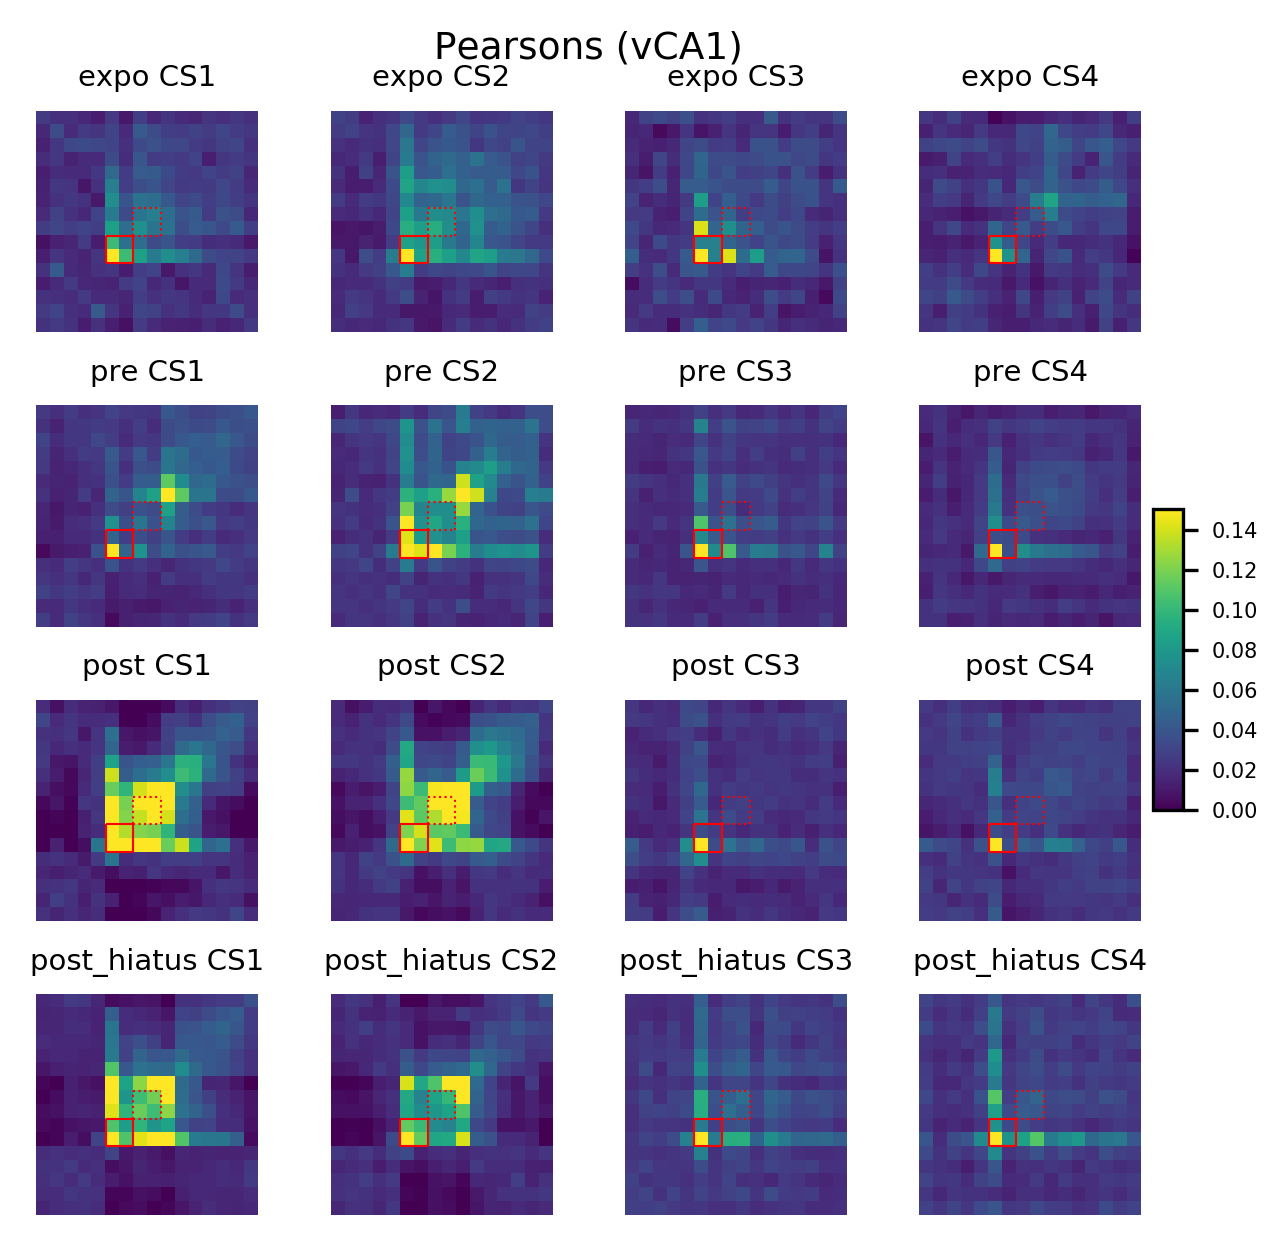

In [28]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(4,4,figsize=(4,4))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

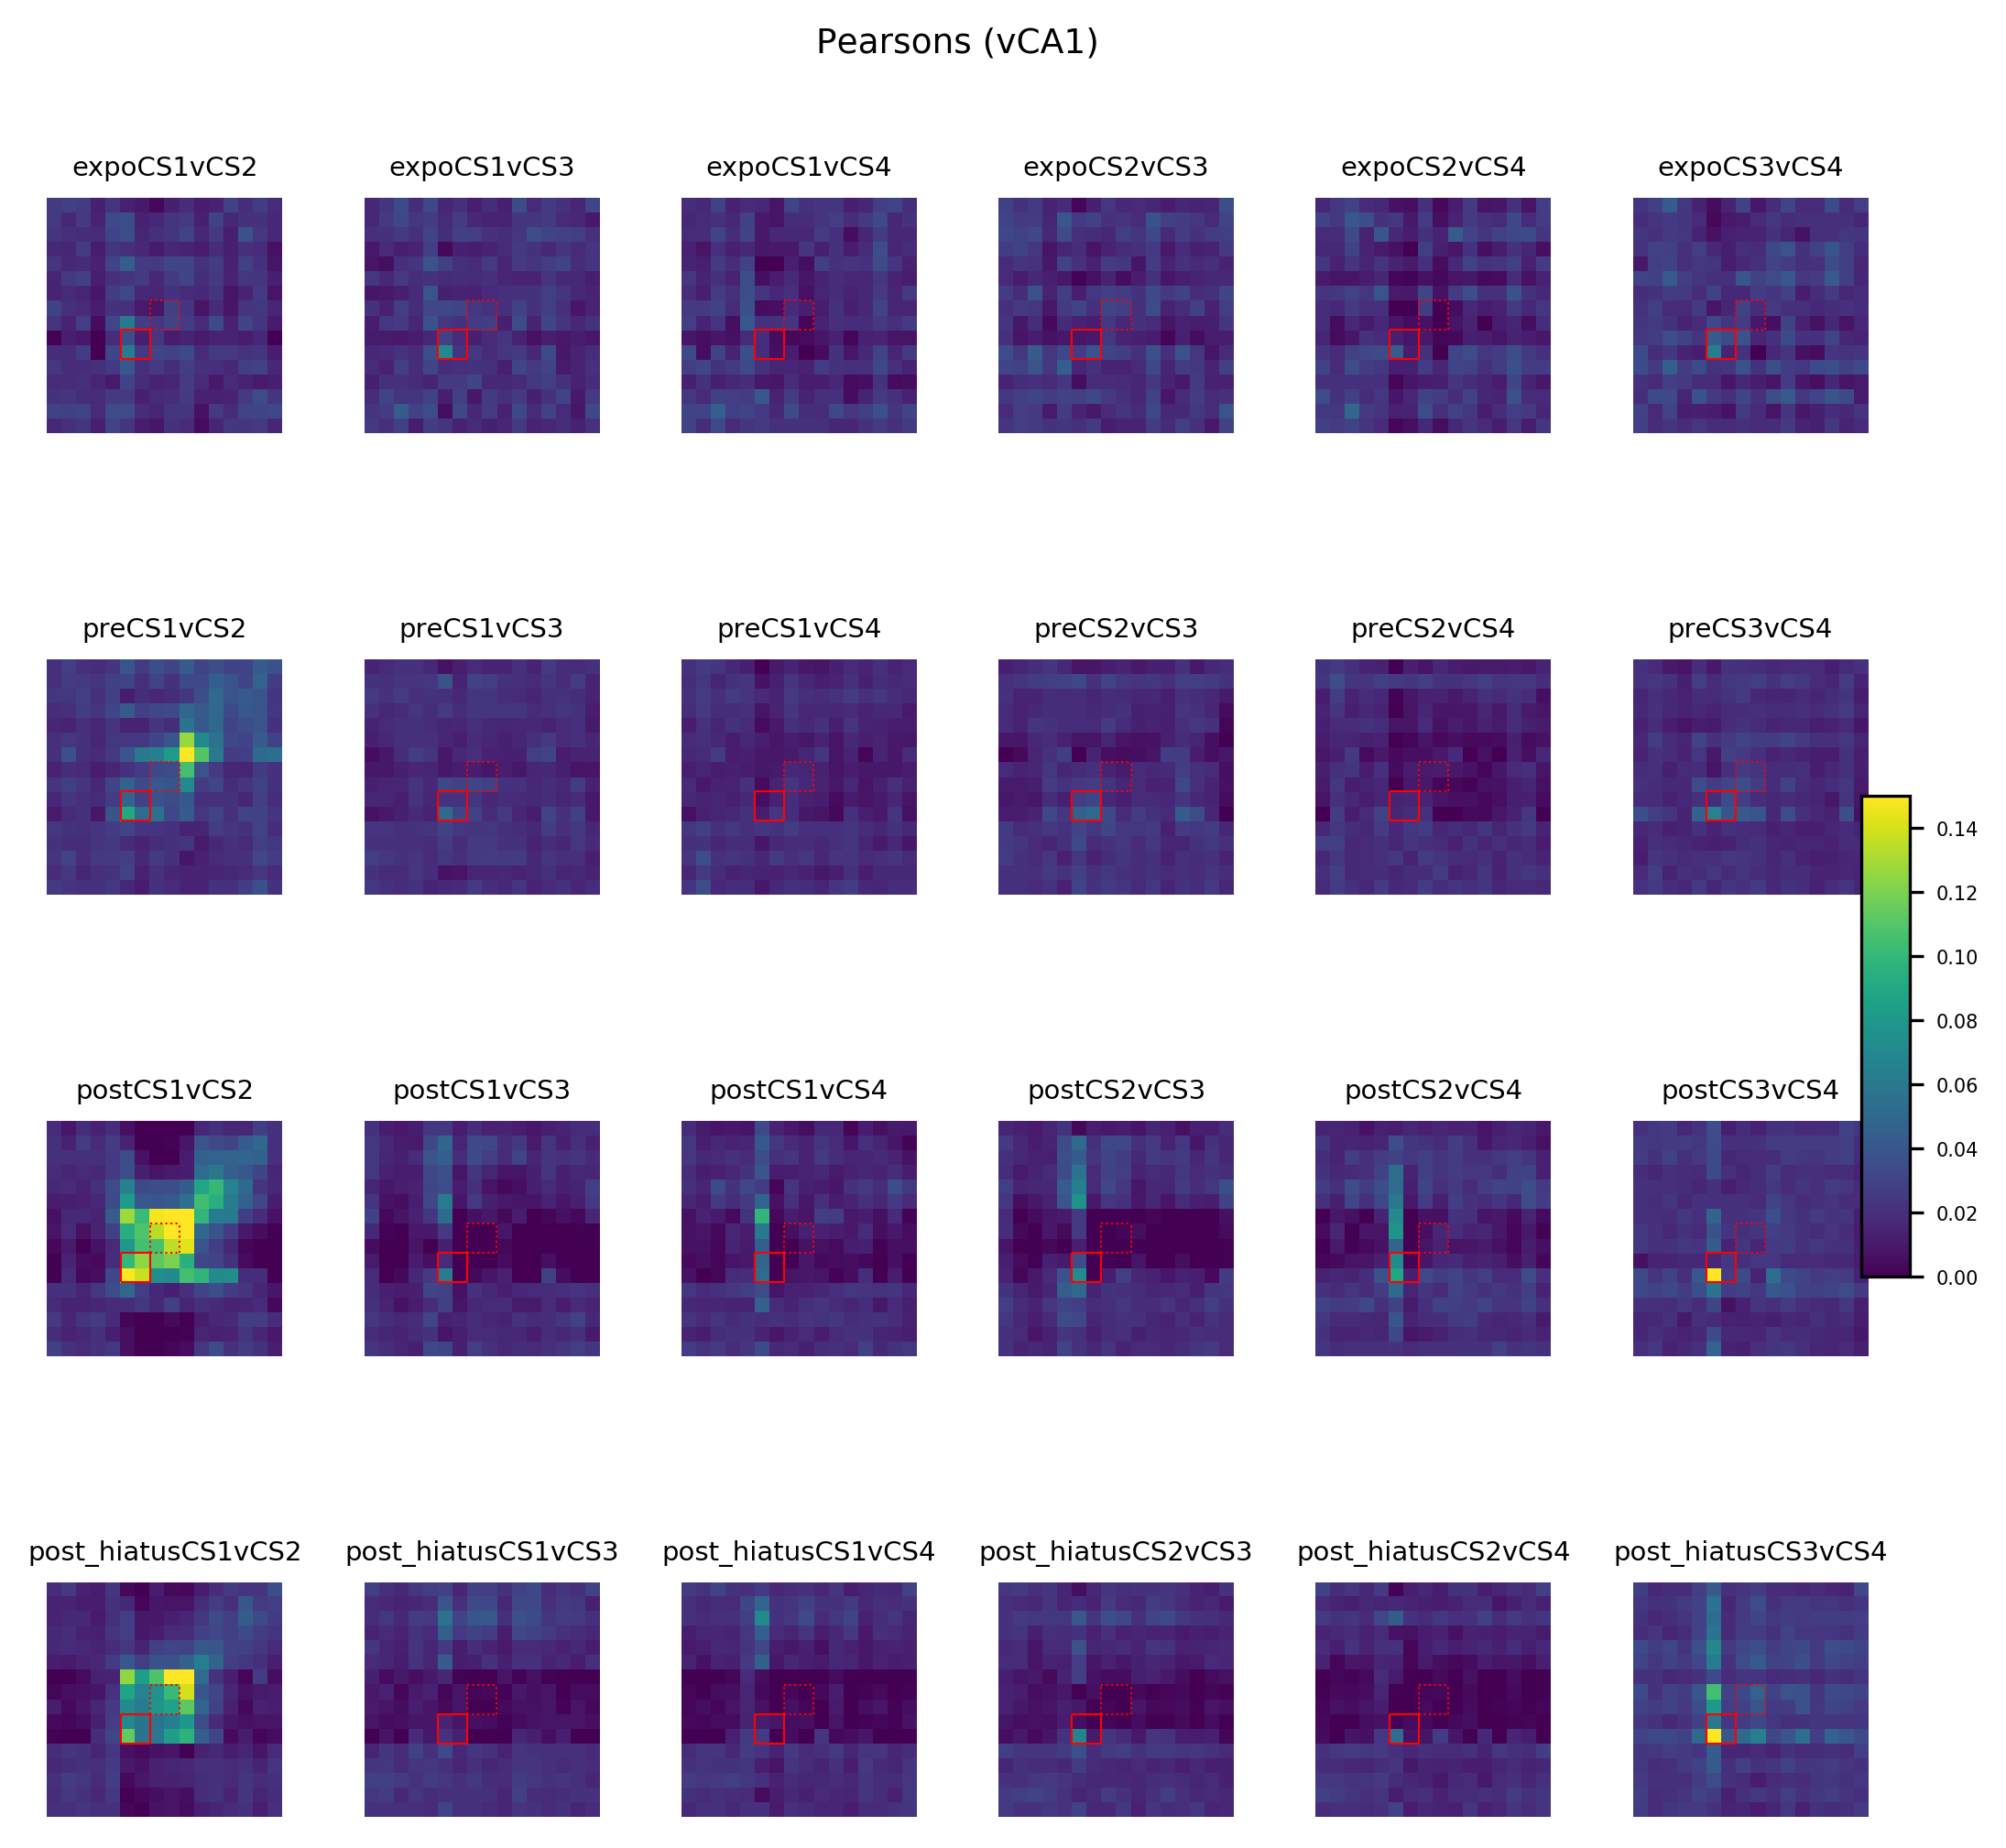

In [18]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(4,6,figsize=(7,7))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

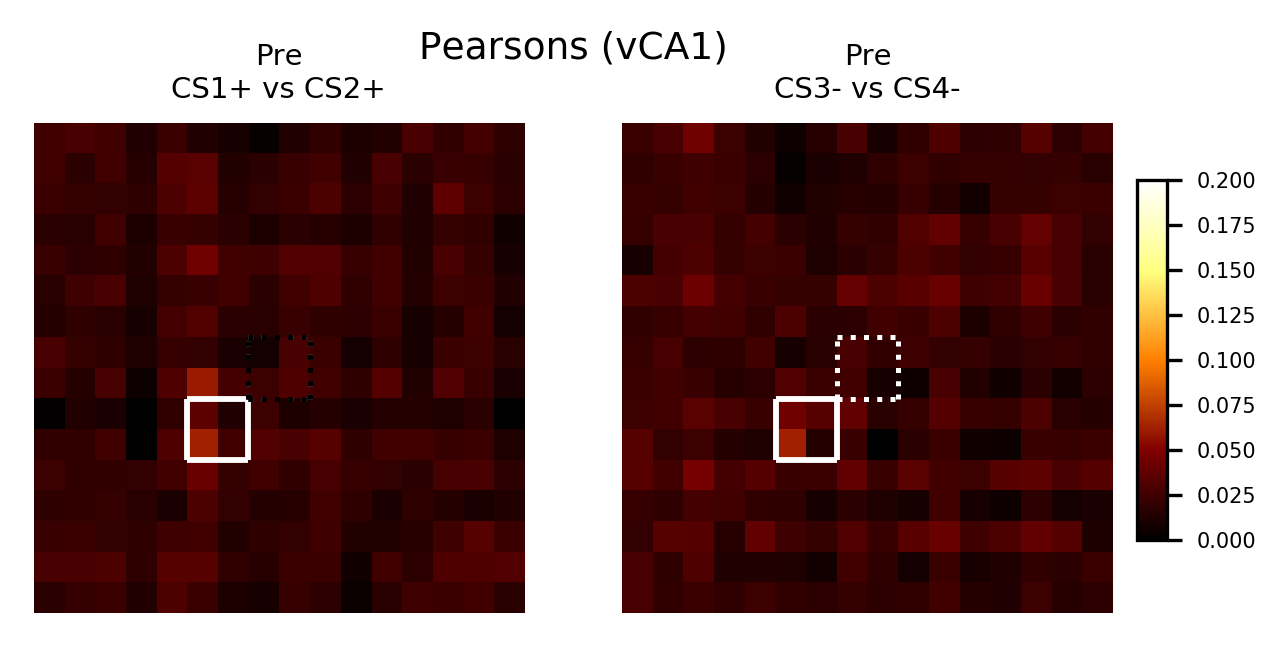

In [12]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(1,2,figsize=(4,2))
sess='expo'
r=0
for trial,trial_la,c in zip(['CS1vCS2','CS3vCS4'],['CS1+ vs CS2+','CS3- vs CS4-'],[0,1]):
        im=axs[c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=0.0, vmax=0.2,cmap='afmhot')
        axs[c].set_title("Pre\n"+trial_la,fontsize=7)
        axs[c].vlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].vlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[0].vlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].vlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        pt.remove_axes(axs[c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.16, 0.025, 0.6])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../figures/%s_Ex_hm.pdf"%NOTEBOOK_NAME)

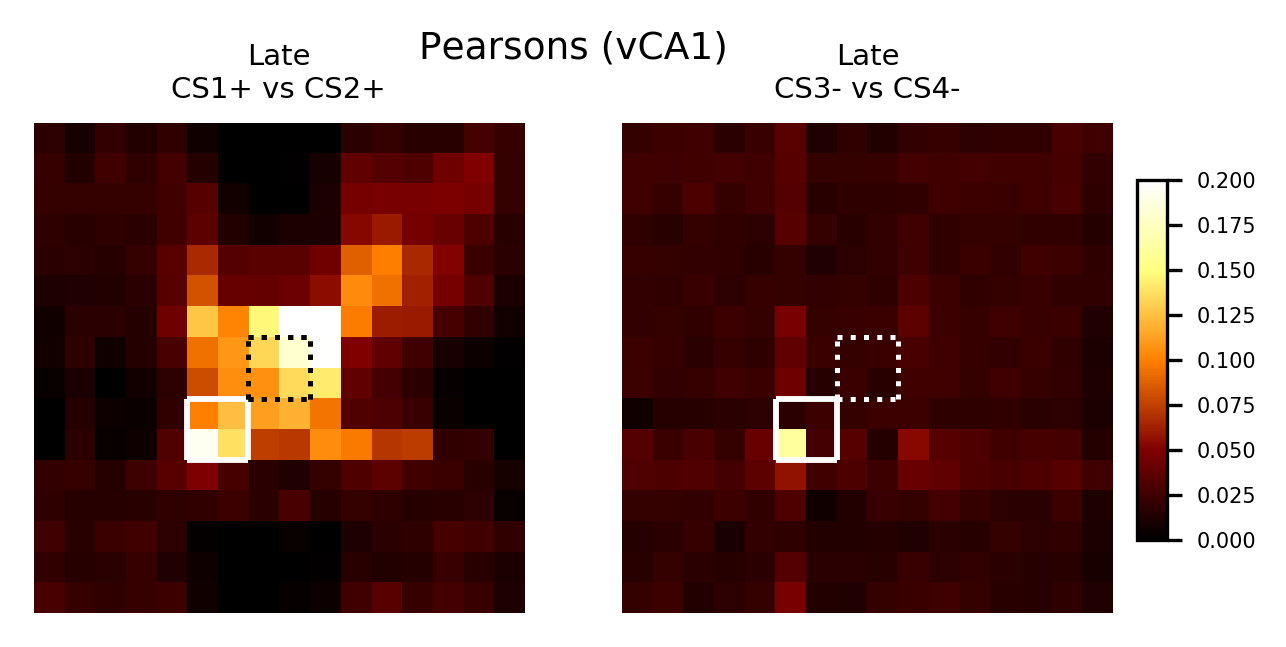

In [30]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(1,2,figsize=(4,2))
sess='post'
r=0
for trial,trial_la,c in zip(['CS1vCS2','CS3vCS4'],['CS1+ vs CS2+','CS3- vs CS4-'],[0,1]):
        im=axs[c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=0.0, vmax=0.2,cmap='afmhot')
        axs[c].set_title("Late\n"+trial_la,fontsize=7)
        axs[c].vlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].vlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[0].vlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].vlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        pt.remove_axes(axs[c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.16, 0.025, 0.6])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../figures/%s_Po_hm.pdf"%NOTEBOOK_NAME)

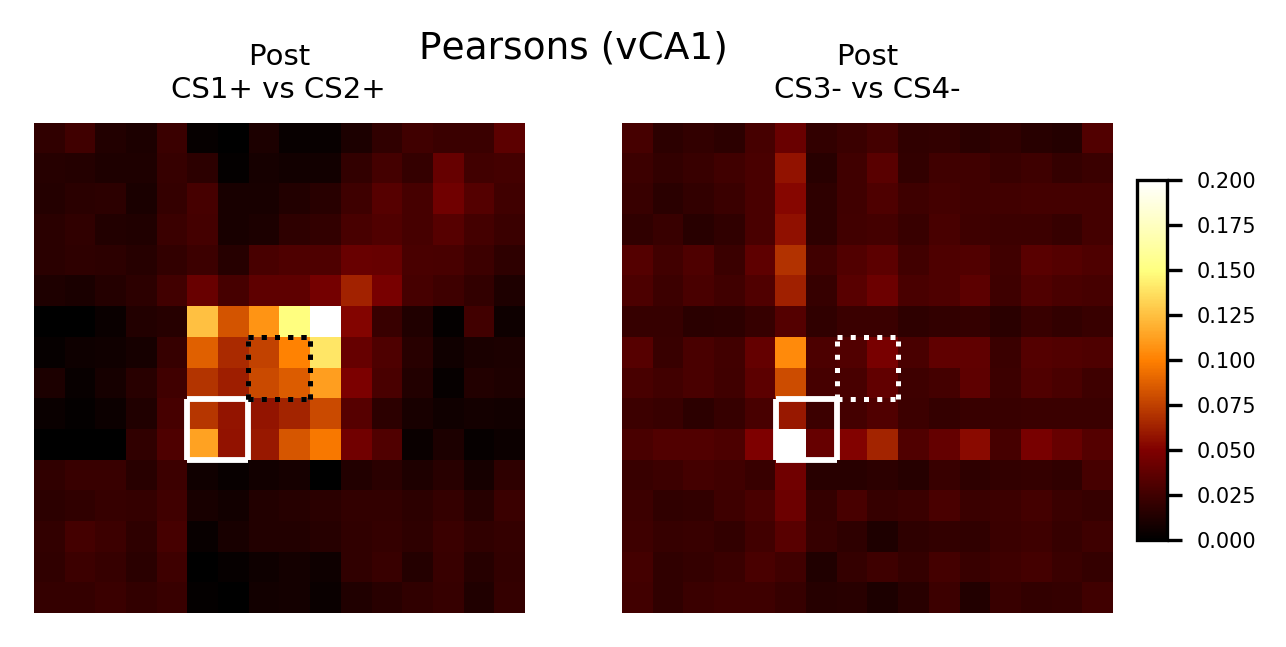

In [32]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(1,2,figsize=(4,2))
sess='post_hiatus'
r=0
for trial,trial_la,c in zip(['CS1vCS2','CS3vCS4'],['CS1+ vs CS2+','CS3- vs CS4-'],[0,1]):
        im=axs[c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=0.0, vmax=0.2,cmap='afmhot')
        axs[c].set_title("Post\n"+trial_la,fontsize=7)
        axs[c].vlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].vlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[0].vlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].vlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        pt.remove_axes(axs[c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.16, 0.025, 0.6])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../figures/%s_Hi_hm.pdf"%NOTEBOOK_NAME)

In [ ]:
#import seaborn as sns
#%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
#
#fig, ax = pl.subplots(1, 1, figsize=(4, 2))
#
#pairs_to_plot = [('tb14_CSp_expo', 'tb14_CSp_expo'),
#                 ('tb14_CSp_expo', 'tb15_CSp_expo'),
#                 ('tb14_CSp_expo', 'tb1_CSp_expo'),
#                 ('tb14_CSm_expo', 'tb14_CSm_expo'),
#                 ('tb14_CSm_expo', 'tb15_CSm_expo'),
#                 ('tb14_CSm_expo', 'tb1_CSm_expo')]
#values = [across_tb_res_expo[p] for p in pairs_to_plot]
#avg_values = [np.mean(across_tb_res_expo[p]) for p in pairs_to_plot]
##seaborn for individual points with jitter
#sns.set(style="white", color_codes=False)
#sns.stripplot(data=values,jitter=True,edgecolor=None,size=2,alpha=.5)
#sns.despine()
#
##colors = np.repeat(['b', 'r', 'silver', 'grey', 'y'], len(values)/5).tolist()
## pt.plot_violins(values, ax=ax, colors=colors)
##positions = range(len(values))
##[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
#
#pt.plot_bars(values, ax=ax, stderr=True)
##pl.bar(range(len(avg_values)),avg_values)
## [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
## [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
## [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]
#
#ax.set_xticks(range(len(values)))
#ax.set_xticklabels(['%s\n%s'%(p[0][2:8], p[1][2:8]) for p in pairs_to_plot], fontsize=5)
##ax.set_xlabel('Pre       Post               Ext1               Ext2           Renew', fontsize=7)
##ax.set_ylim(-0.05, 0.5)
#ax.set_ylabel("Pattern similarity")
#pt.nicer_plot(ax)
#
#fig.tight_layout()
#
#ax.set_title('Pearsons correlation')
##fig.savefig("../img/similarity_CSp_dhpc_JSB.jpg")

### now look at similarity at beginning and end of session

In [ ]:
def compute_similarity_matrix_across (pattern_ids, all_patterns1, all_patterns2):
    
    corrmat_distr = {}
    for i, (l, a) in enumerate(zip(pattern_ids, all_patterns1)):
        for j, (m, b) in enumerate(zip(pattern_ids, all_patterns2)):
            temp = []
            for ii, aa in enumerate(a):
                for jj, bb in enumerate(b):
                    # skip if either of the 2 vecotrs is zero
                    if np.sum(aa)==0 or np.sum(bb)==0: continue
                    # count once if using same data
                    if l==m and jj<ii: continue
                    temp.append(sstats.pearsonr(aa, bb)[0])
            corrmat_distr[(l, m)] = temp
    corrmat = np.zeros((len(pattern_ids), len(pattern_ids)))
    for i, p in enumerate(pattern_ids):
        for j, q in enumerate(pattern_ids):
            corrmat[i][j] = np.mean(corrmat_distr[(p, q)])

    return corrmat_distr, corrmat

In [36]:
%%time
#extract the first or last 10 trials of each trial type and make a new variable. For first trials, take beginning with trial 5)
for tb in bins:
    for sess in sessions[1:]:  #exclude expo
        exec("first_patterns_%s_%s=[]"%(tb,sess))
        for x in range(len(eval("all_patterns_%s_%s"%(tb,sess)))):
            exec("first_patterns_%s_%s.append(all_patterns_%s_%s[x][5:15])"%(tb,sess,tb,sess))
            
        exec("last_patterns_%s_%s=[]"%(tb,sess))
        for x in range(len(eval("all_patterns_%s_%s"%(tb,sess)))):
            exec("last_patterns_%s_%s.append(all_patterns_%s_%s[x][-10:])"%(tb,sess,tb,sess))
        
        #exec("first_last_patterns_%s = np.append(first_patterns_%s, last_patterns_%s,axis=0)"%(sess,sess,sess))
        corrmat_distr, corrmat = compute_similarity_matrix_across(eval("pattern_ids_%s_%s"%(tb,sess)),
                                 eval("first_patterns_%s_%s"%(tb,sess)),eval("last_patterns_%s_%s"%(tb,sess)))
        exec("separated_first_last_res_%s_%s=corrmat_distr"%(tb,sess))
        print '%s DONE!'%sess,

pre DONE! post DONE! post_hiatus DONE! pre DONE! post DONE! post_hiatus DONE!CPU times: user 6min 20s, sys: 50.7 s, total: 7min 10s
Wall time: 6min 20s



In [38]:
#make matrix of all comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess in sessions[1:]:
            for odor in odors:
                exec("FL_matrix_%s_%s_%s_%s = []"%(tb,sess,odor,tb1))
                exec("FL_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("FL_matrix_%s_%s_%s_%s"%(tb,sess,odor,tb1)).insert(tb2,eval("np.mean(separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess)))
                    eval("FL_matrix_%s_%s_%s_%s_all"%(tb,sess,odor,tb1)).insert(tb2,eval("separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess)))

In [43]:
#make matrix of all CSP vs CSm comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess in sessions[1:]:
                exec("FL_matrix_%s_%s_%s_%s = []"%(tb,sess,odor_comp,tb1))
                exec("FL_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor_comp,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("FL_matrix_%s_%s_%s_%s"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("np.mean(separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))
                    eval("FL_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))

In [44]:
#get standard deviation and standard error for individual trial vs trial comparisons
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in sessions[1:]:
                exec("FL_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("FL_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("FL_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("FL_matrix_%s_%s_%s_%s_std.append(np.std(FL_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("FL_matrix_%s_%s_%s_%s_err.append(np.std(FL_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(FL_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("FL_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("FL_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("FL_matrix_%s_%s_%s_%s_std.append(np.std(FL_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("FL_matrix_%s_%s_%s_%s_err.append(np.std(FL_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(FL_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

In [48]:
for tb,i in zip(bins,range(len(bins))):
    for sess in sessions[1:]:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("FL_big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("FL_big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("FL_matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

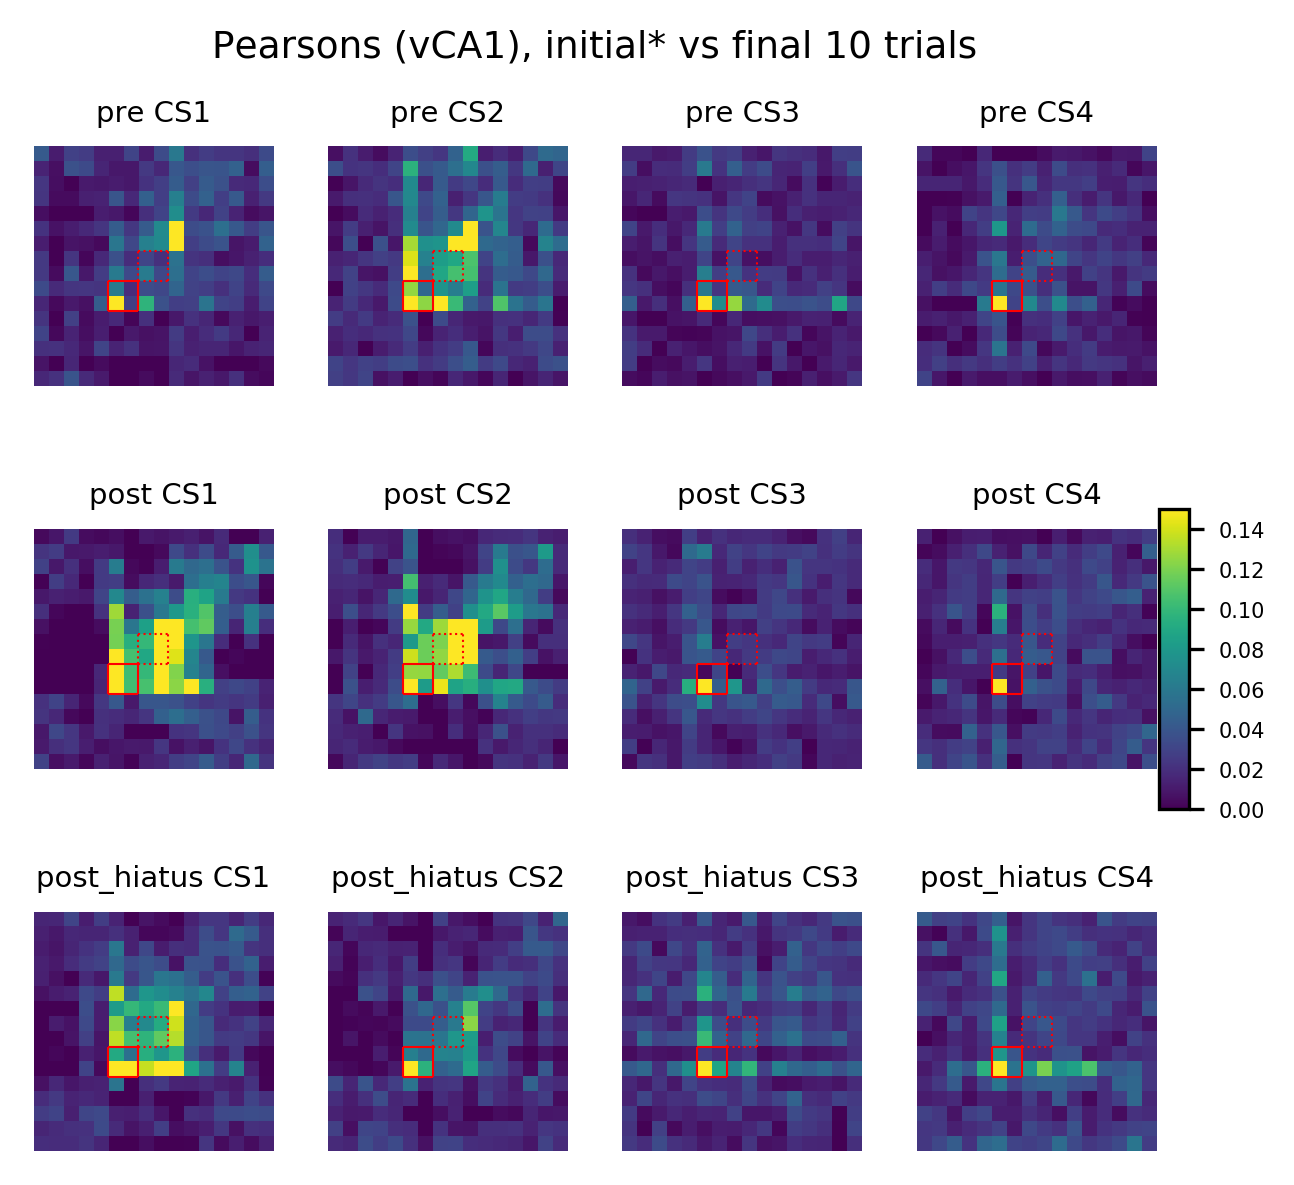

In [52]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,4))
for sess,r in zip(sessions[1:],range(len(sessions[1:]))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("FL_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), initial* vs final 10 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

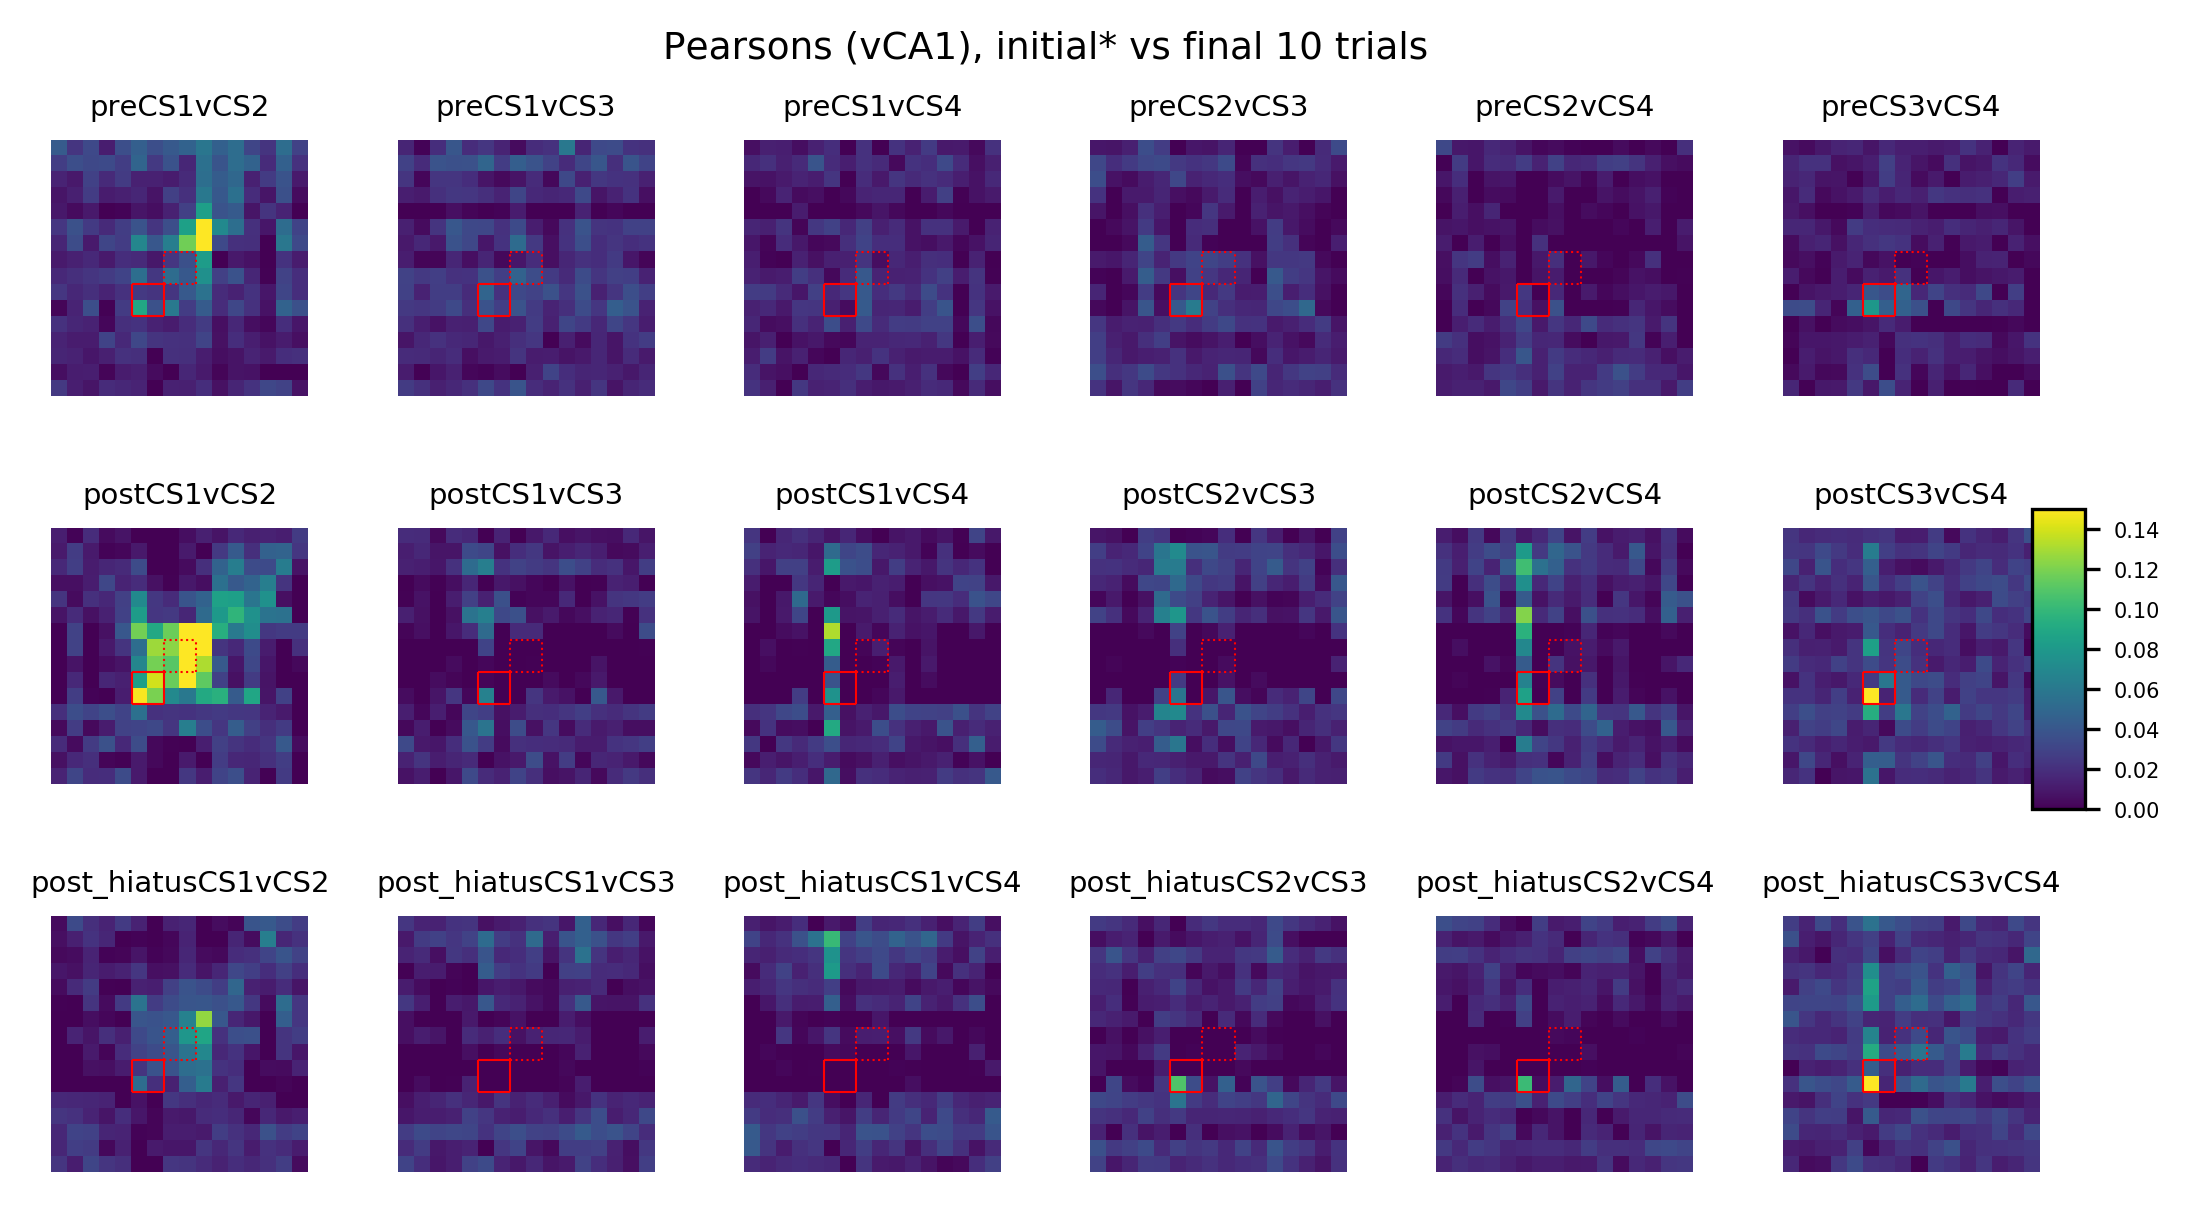

In [58]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,6,figsize=(7,4))
for sess,r in zip(sessions[1:],range(len(sessions[1:]))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("FL_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), initial* vs final 10 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

#importing seaborn below messes with this plot

fig,axs = pl.subplots(5,3,figsize=(5,8))
for sess,r in zip(sessions[1:],range(len(sessions[1:]))):
    for trial,trialw,c in zip(['CSp','CSm','CSp_v_CSm'],['CS+','CS-','CS+ vs CS-'],[0,1,2]):
        im=axs[r][c].imshow(eval("FL_big_matrix_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trialw,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), initial vs final 30 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../img/%s_firstVSlast.jpg"%NOTEBOOK_NAME)

### just do correlations on the middle 20 trials

In [19]:
%%time
#extract the mid or last 10 trials of each trial type and make a new variable. For mid trials, take beginning with trial 5)
for tb in bins:
    for sess in sessions[1:]:  #exclude expo
        exec("mid_patterns_%s_%s=[]"%(tb,sess))
        for x in range(len(eval("all_patterns_%s_%s"%(tb,sess)))):
            exec("mid_patterns_%s_%s.append(all_patterns_%s_%s[x][6:26])"%(tb,sess,tb,sess))
        
        corrmat_distr, corrmat = ut.compute_similarity_matrix(eval("pattern_ids_%s_%s"%(tb,sess)),eval("mid_patterns_%s_%s"%(tb,sess)))
        exec("mid_res_%s_%s=corrmat_distr"%(tb,sess))
        print '%s DONE!'%sess,

pre DONE! post DONE! post_hiatus DONE! pre DONE! post DONE! post_hiatus DONE!CPU times: user 23min 12s, sys: 2min 42s, total: 25min 55s
Wall time: 23min 16s



In [20]:
#make matrix of all comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess in sessions[1:]:
            for odor in odors:
                exec("mid_matrix_%s_%s_%s_%s = []"%(tb,sess,odor,tb1))
                exec("mid_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("mid_matrix_%s_%s_%s_%s"%(tb,sess,odor,tb1)).insert(tb2,eval("np.mean(mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess)))
                    eval("mid_matrix_%s_%s_%s_%s_all"%(tb,sess,odor,tb1)).insert(tb2,eval("mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess)))

In [21]:
#make matrix of all odor comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess in sessions[1:]:
                exec("mid_matrix_%s_%s_%s_%s = []"%(tb,sess,odor_comp,tb1))
                exec("mid_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor_comp,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("mid_matrix_%s_%s_%s_%s"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("np.mean(mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))
                    eval("mid_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))

In [22]:
#get standard deviation and standard error for individual trial vs trial comparisons
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in sessions[1:]:
                exec("mid_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("mid_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("mid_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("mid_matrix_%s_%s_%s_%s_std.append(np.std(mid_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("mid_matrix_%s_%s_%s_%s_err.append(np.std(mid_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(mid_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("mid_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("mid_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("mid_matrix_%s_%s_%s_%s_std.append(np.std(mid_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("mid_matrix_%s_%s_%s_%s_err.append(np.std(mid_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(mid_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

In [23]:
for tb,i in zip(bins,range(len(bins))):
    for sess in sessions[1:]:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("mid_big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("mid_big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("mid_matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

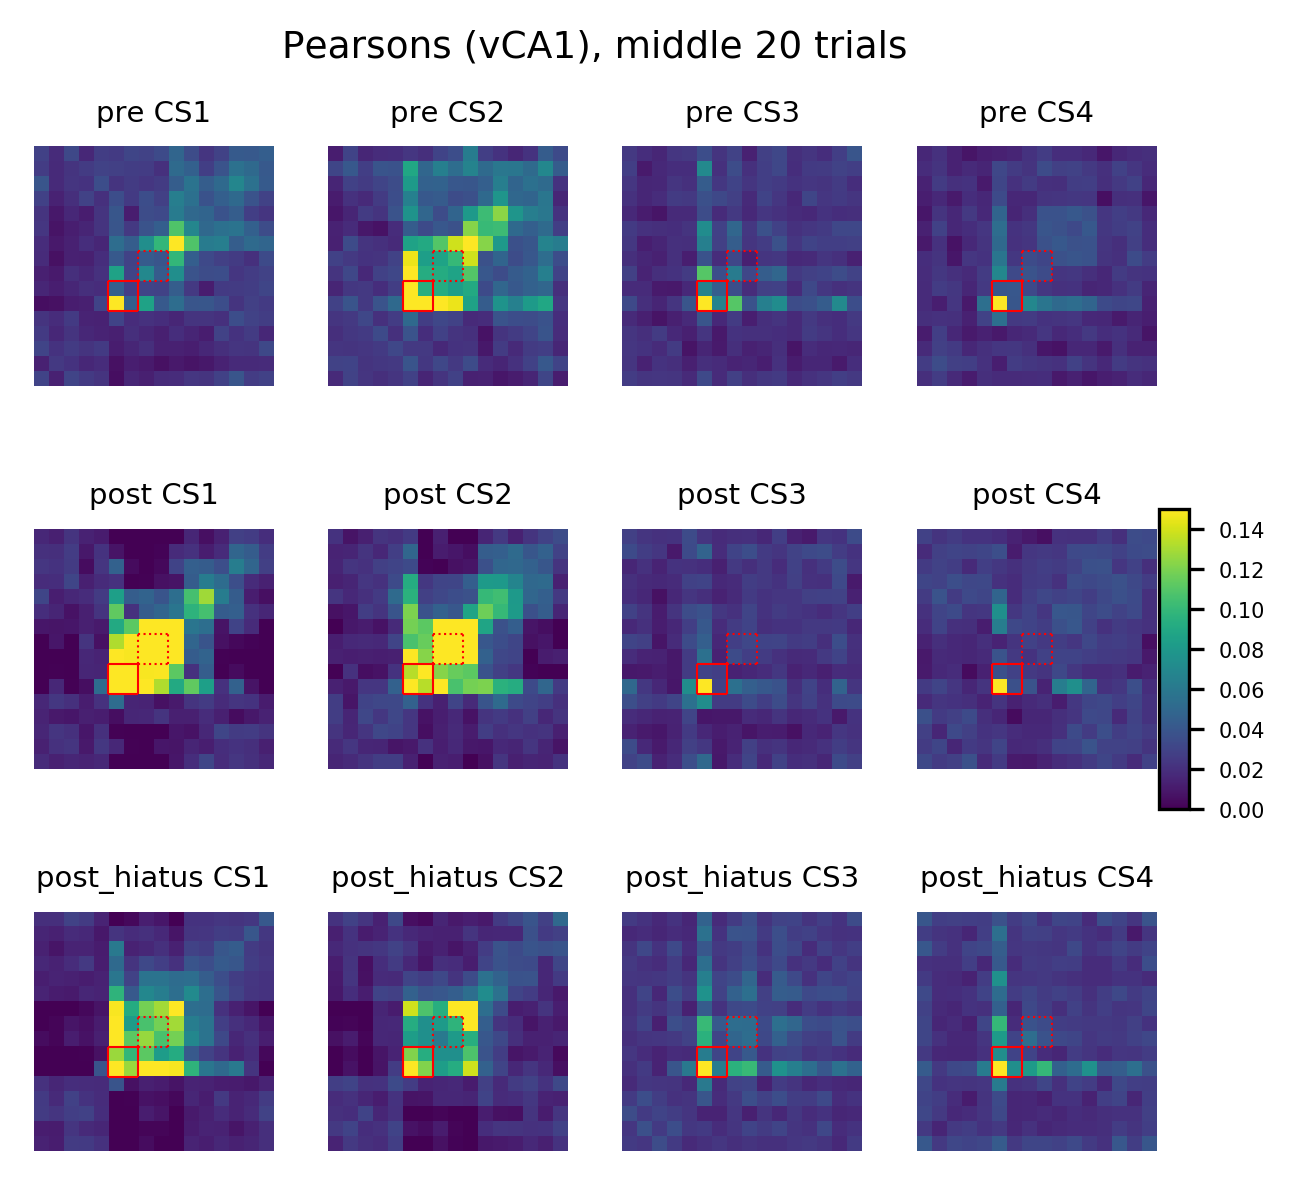

In [24]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,4))
for sess,r in zip(sessions[1:],range(len(sessions[1:]))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("mid_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 20 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

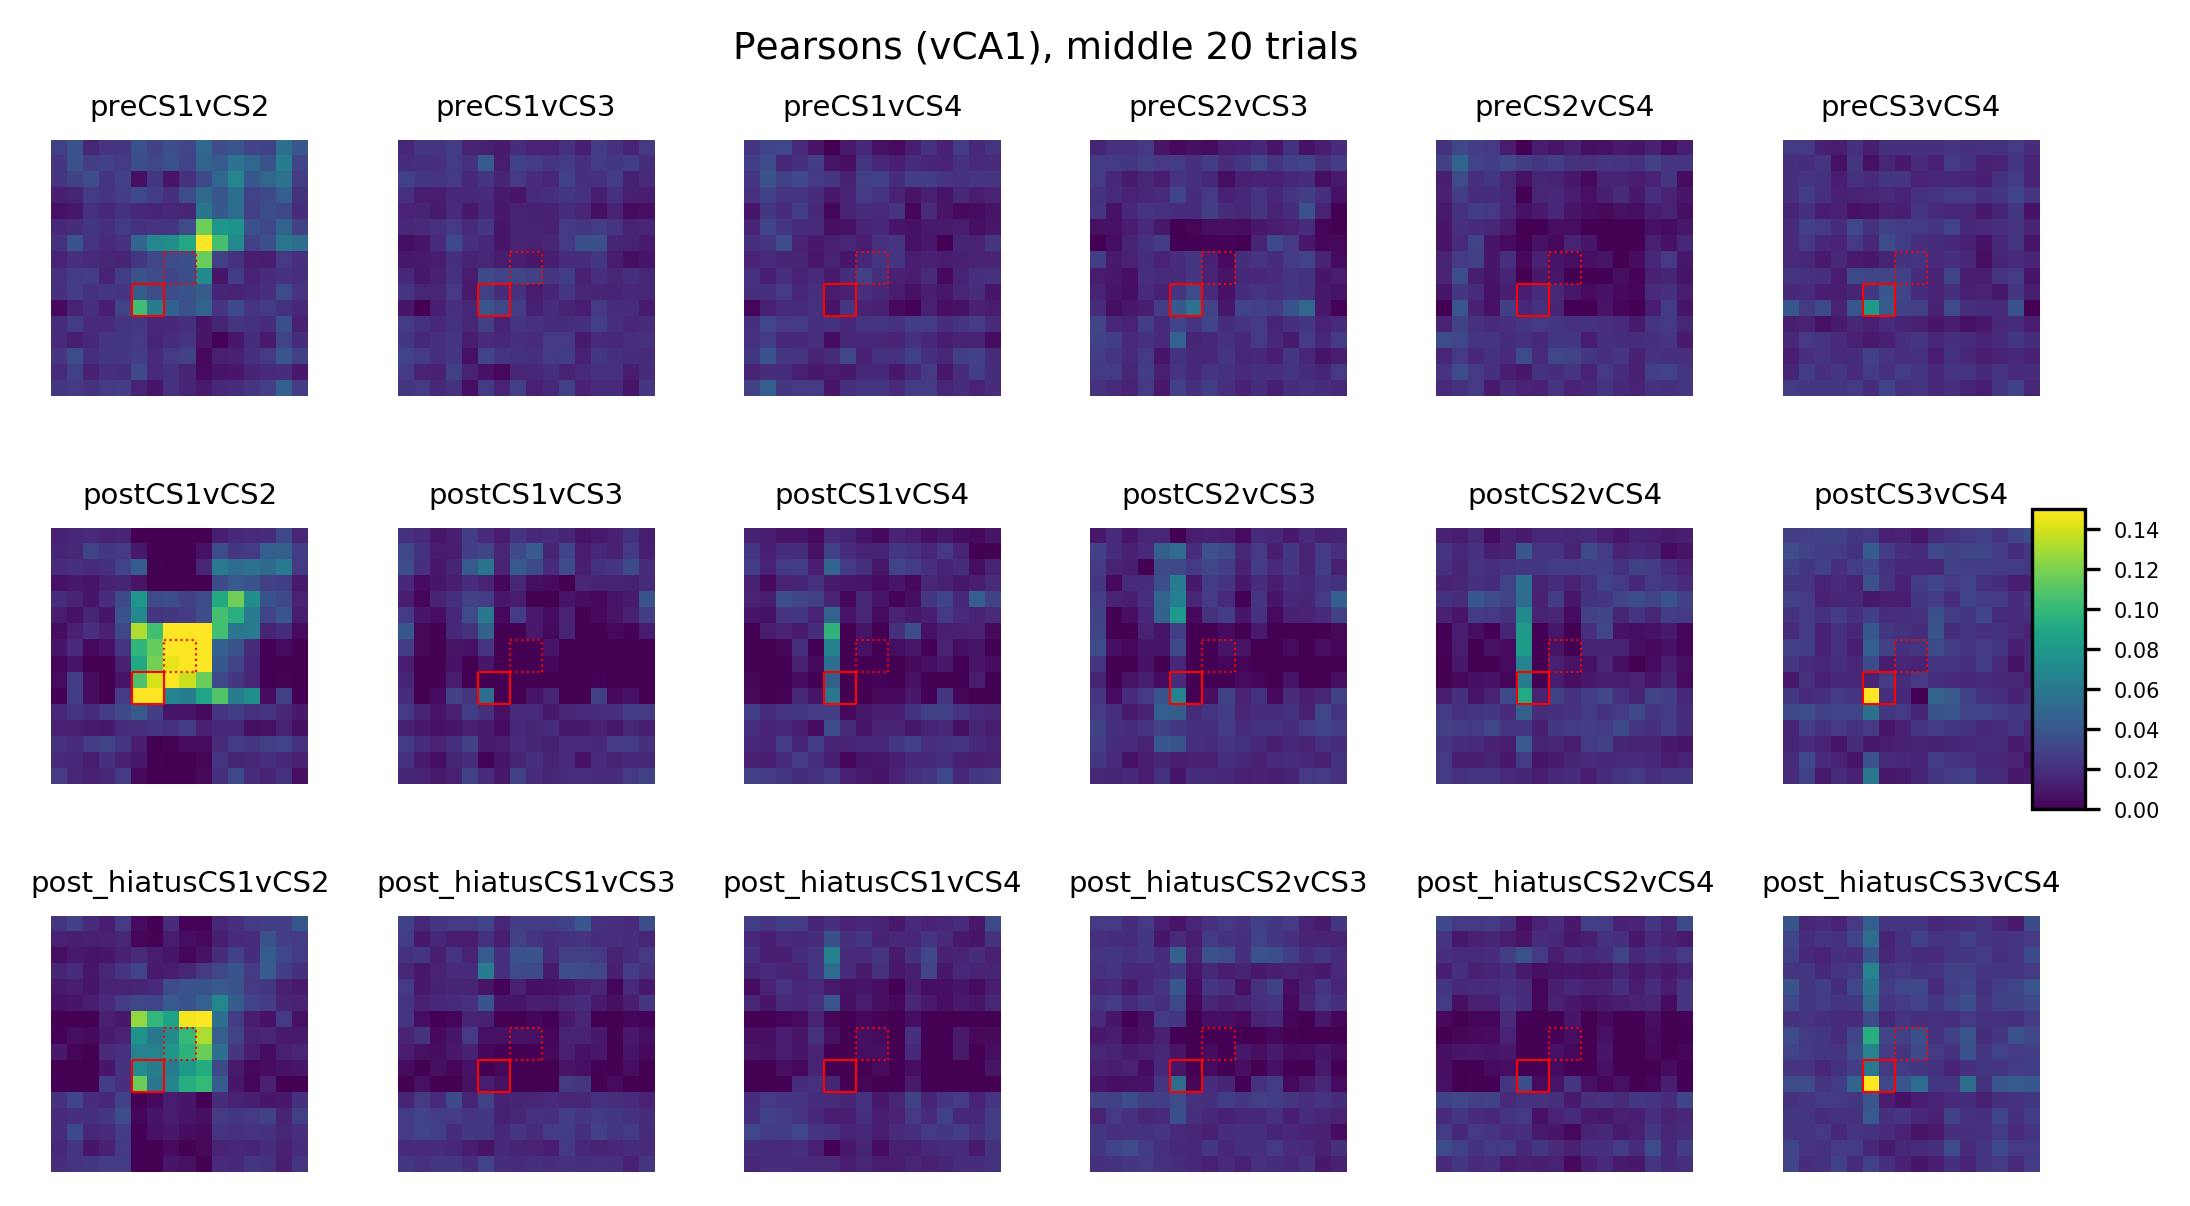

In [25]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,6,figsize=(7,4))
for sess,r in zip(sessions[1:],range(len(sessions[1:]))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("mid_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 20 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

(0, 0.6)

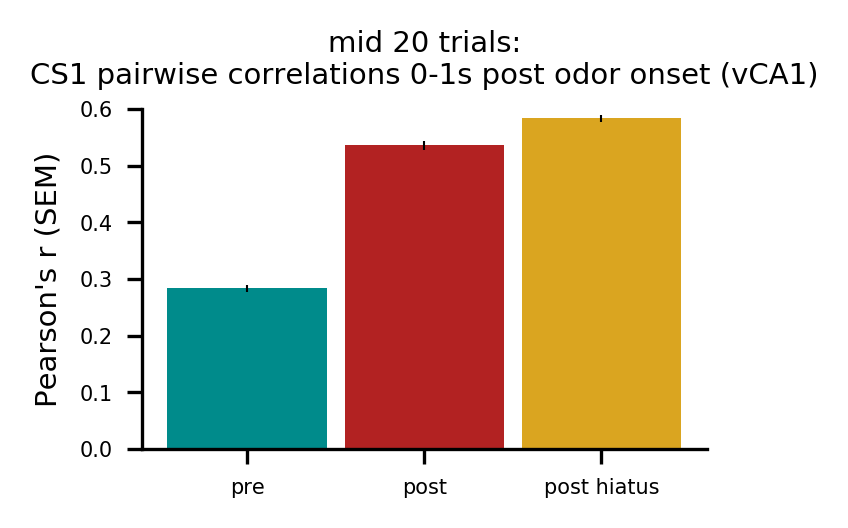

In [106]:
dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions[1:],range(len(sessions[1:]))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS1_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS1_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 20 trials:\nCS1 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

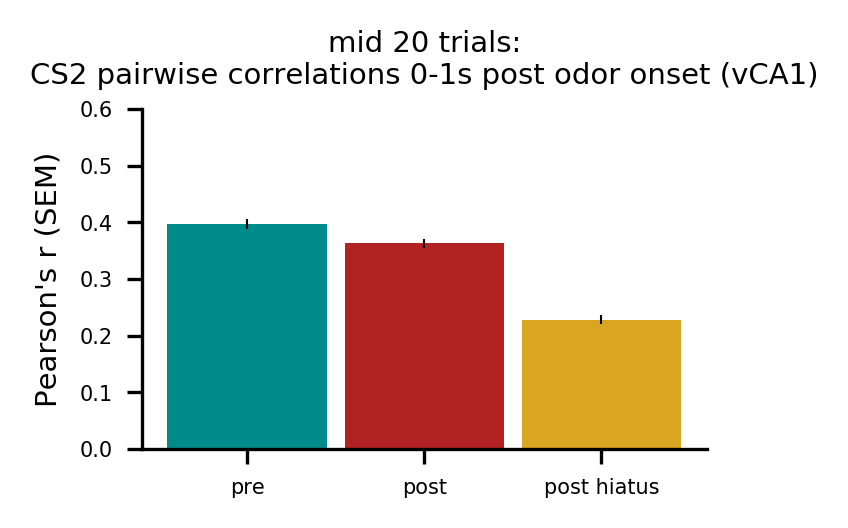

In [107]:
dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions[1:],range(len(sessions[1:]))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS2_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS2_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 20 trials:\nCS2 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

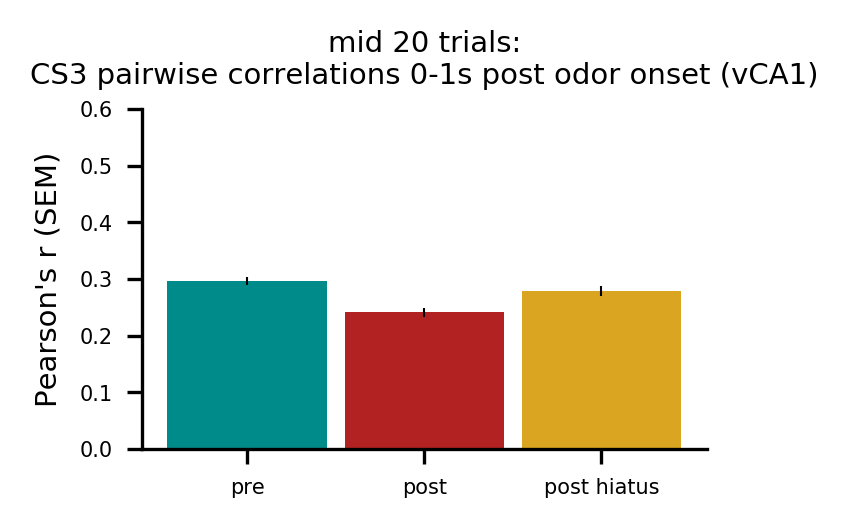

In [108]:
dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions[1:],range(len(sessions[1:]))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS3_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS3_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 20 trials:\nCS3 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

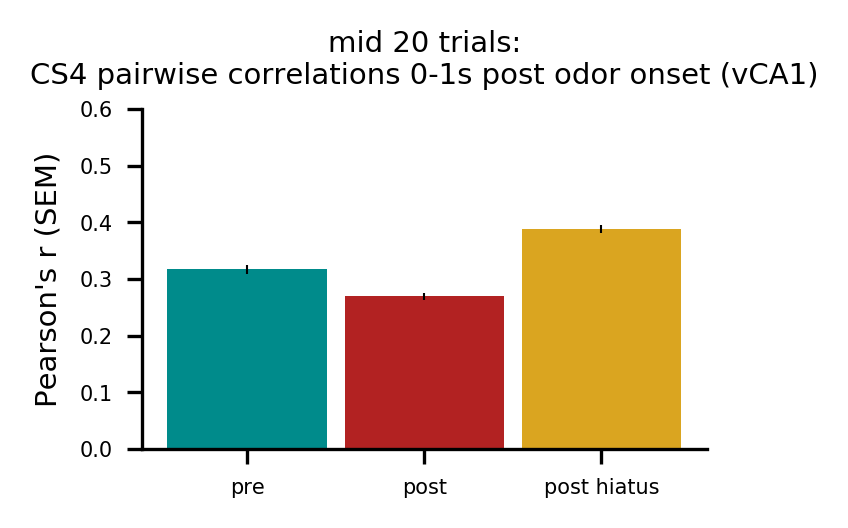

In [6]:
dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions[1:],range(len(sessions[1:]))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS4_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS4_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 20 trials:\nCS4 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

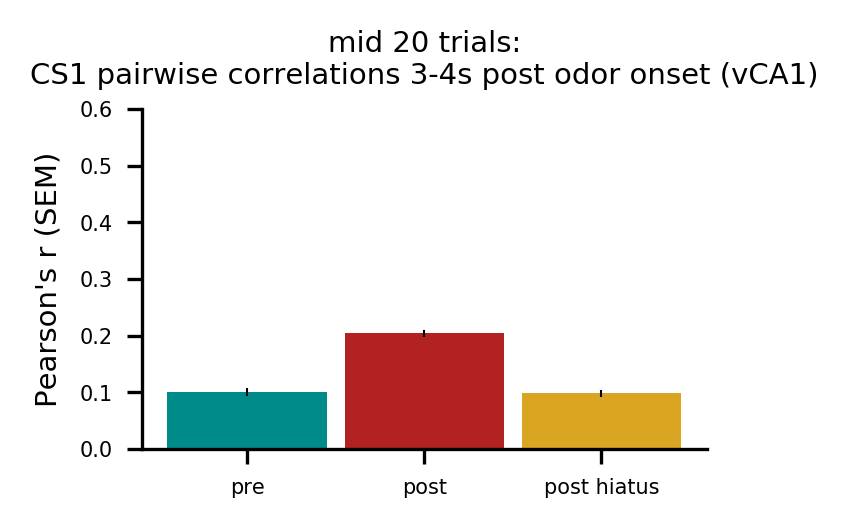

In [96]:
dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions[1:],range(len(sessions[1:]))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS2_8[8]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS2_8_err[8]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 20 trials:\nCS1 pairwise correlations 3-4s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

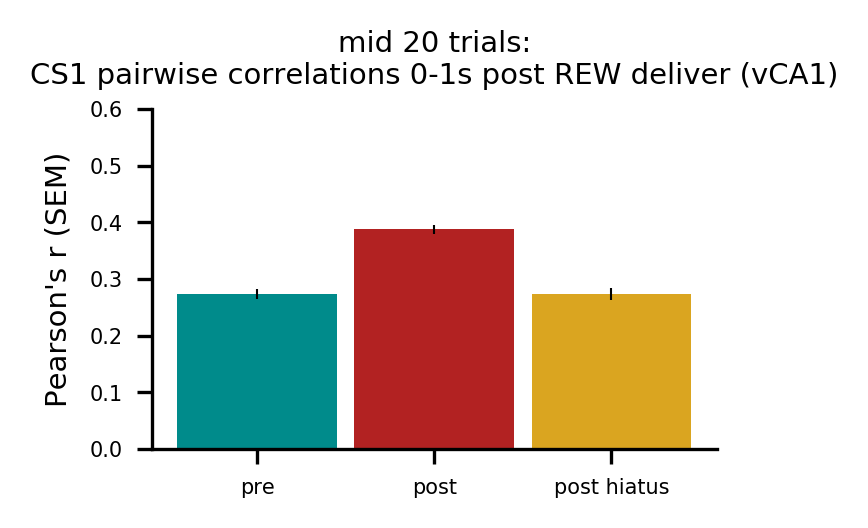

In [97]:
dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions[1:],range(len(sessions[1:]))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS1_9[9]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS1_9_err[9]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 20 trials:\nCS1 pairwise correlations 0-1s post REW deliver (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

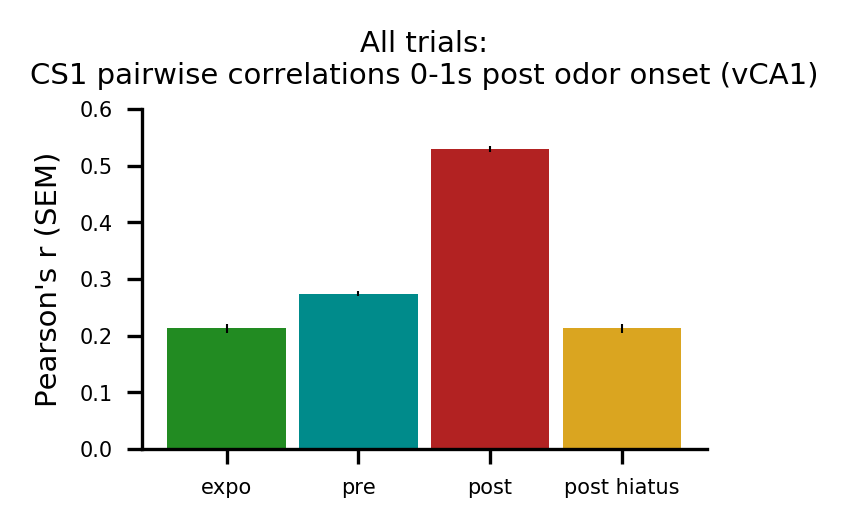

In [103]:
dark_co = ('forestgreen','darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS1_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS1_5_err[5]"%sess))
pl.xticks([0,1,2,3],['expo','pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS1 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

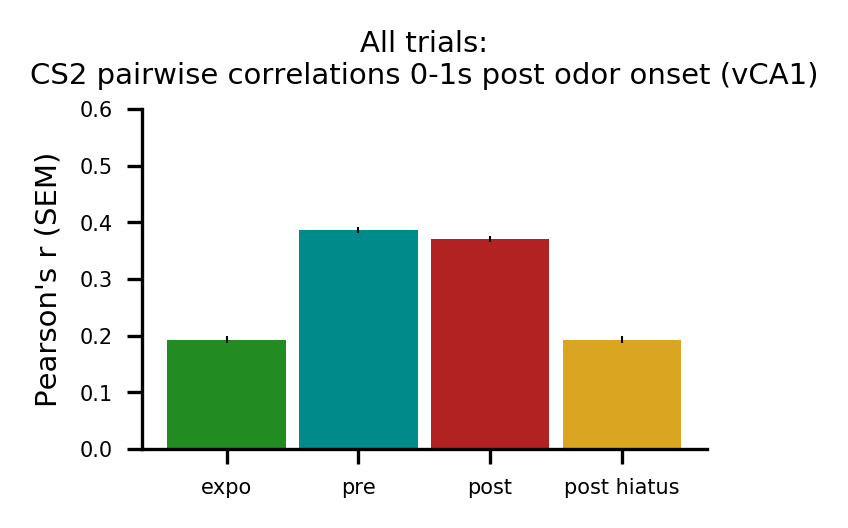

In [102]:
dark_co = ('forestgreen','darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS2_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS2_5_err[5]"%sess))
pl.xticks([0,1,2,3],['expo','pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS2 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

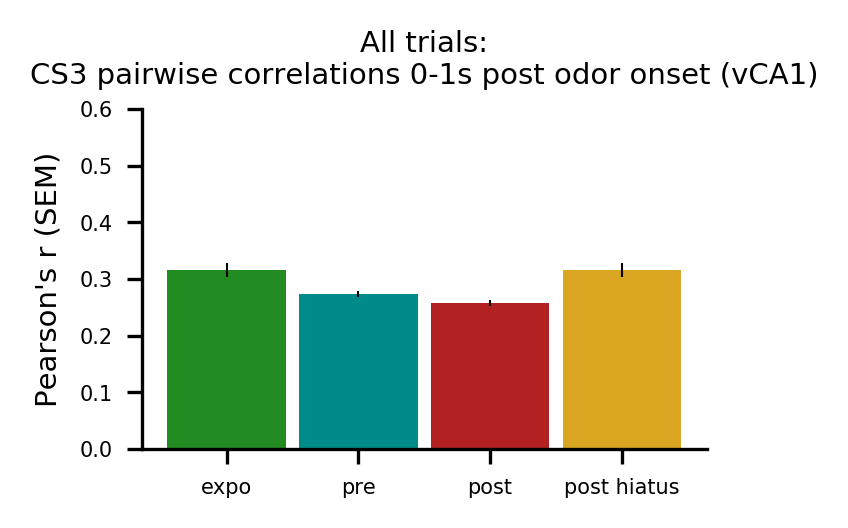

In [104]:
dark_co = ('forestgreen','darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS3_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS3_5_err[5]"%sess))
pl.xticks([0,1,2,3],['expo','pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS3 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

(0, 0.6)

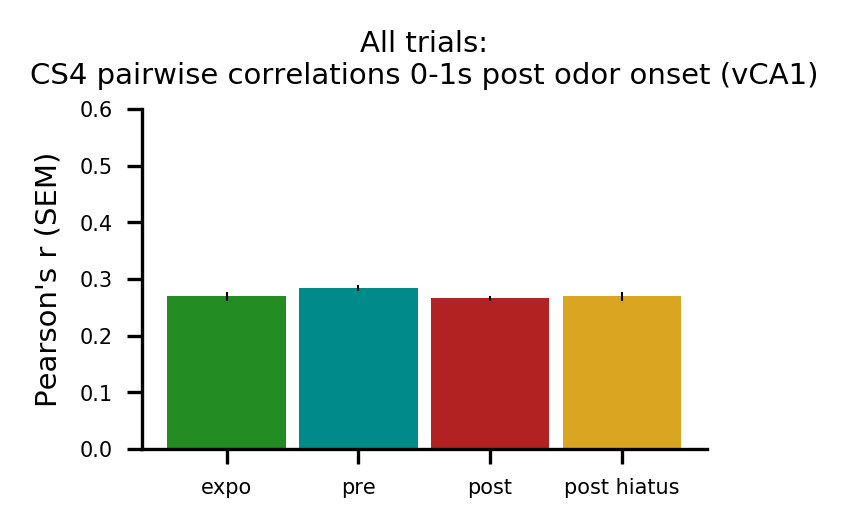

In [105]:
dark_co = ('forestgreen','darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS4_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS4_5_err[5]"%sess))
pl.xticks([0,1,2,3],['expo','pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS4 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

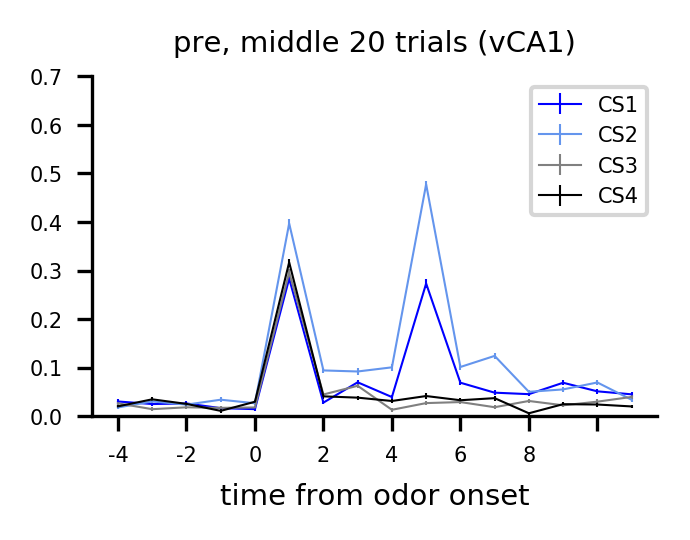

In [143]:
sess='pre'
for odor,c in zip(odors,['b','cornflowerblue','gray','k']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=odor)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2)) 
pl.ylim(0,.7)
pl.legend()
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%sess)

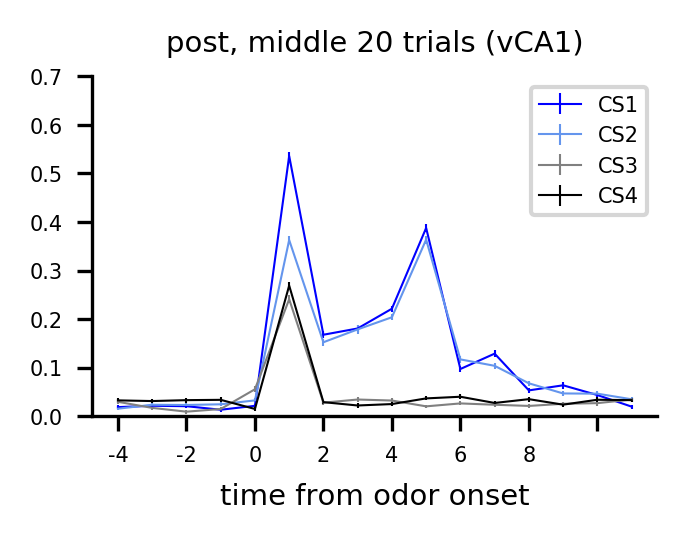

In [142]:
sess='post'
for odor,c in zip(odors,['b','cornflowerblue','gray','k']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=odor)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%sess)

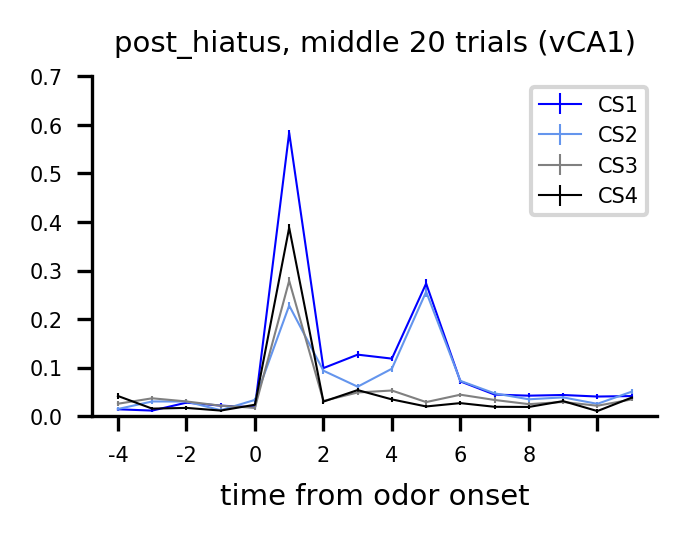

In [141]:
sess='post_hiatus'
for odor,c in zip(odors,['b','cornflowerblue','gray','k']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=odor)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%sess)

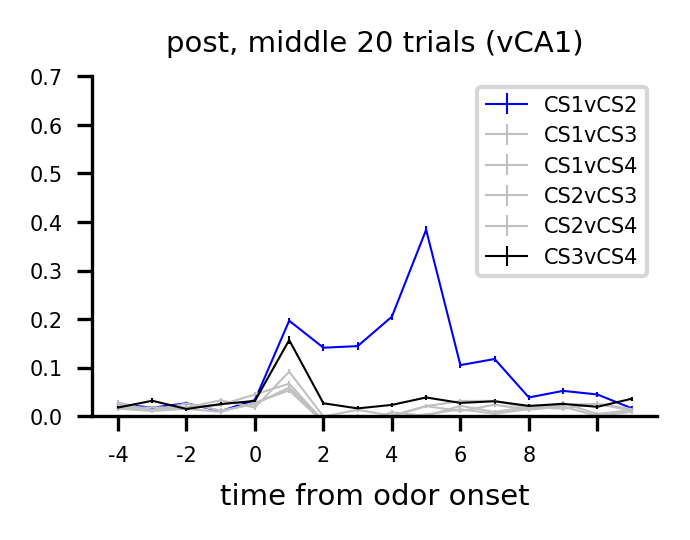

In [9]:
sess='post'
for odor,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],['b','silver','silver','silver','silver','k']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=odor)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%sess)

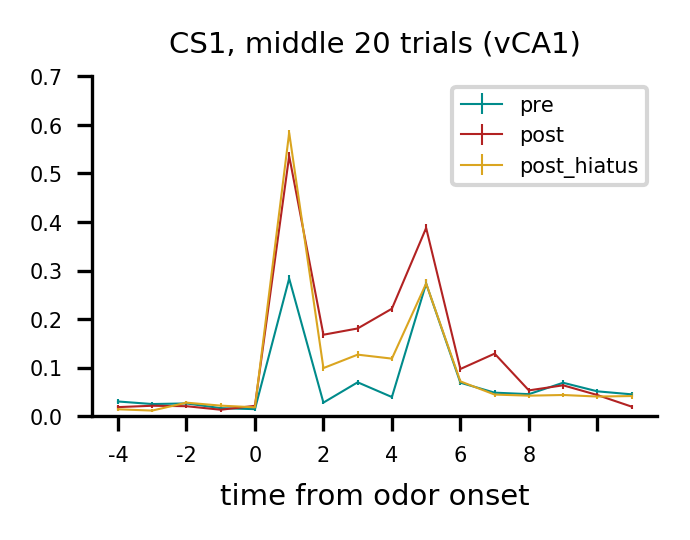

In [146]:
odor='CS1'
for sess,c in zip(sessions[1:],['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%odor)

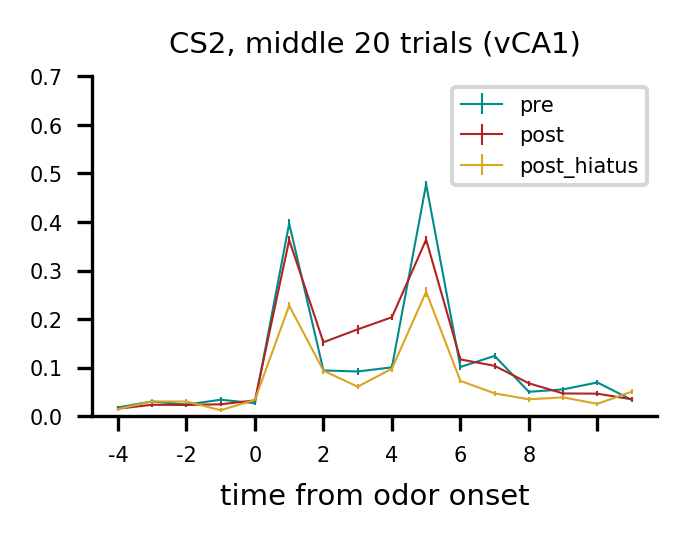

In [147]:
odor='CS2'
for sess,c in zip(sessions[1:],['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%odor)

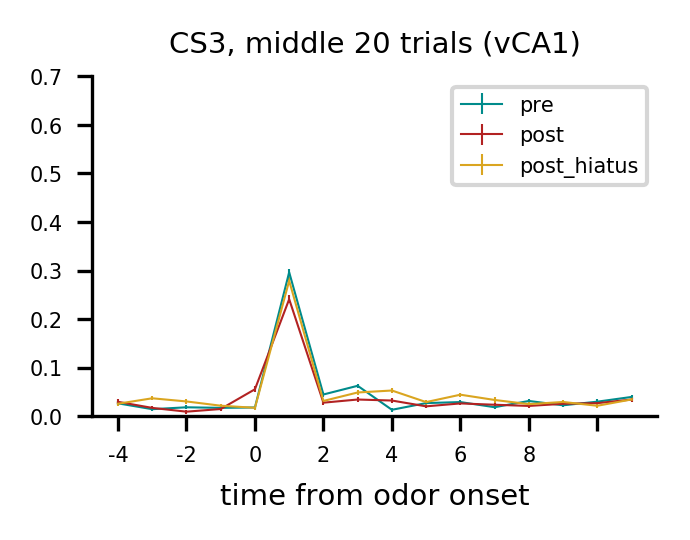

In [148]:
odor='CS3'
for sess,c in zip(sessions[1:],['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%odor)

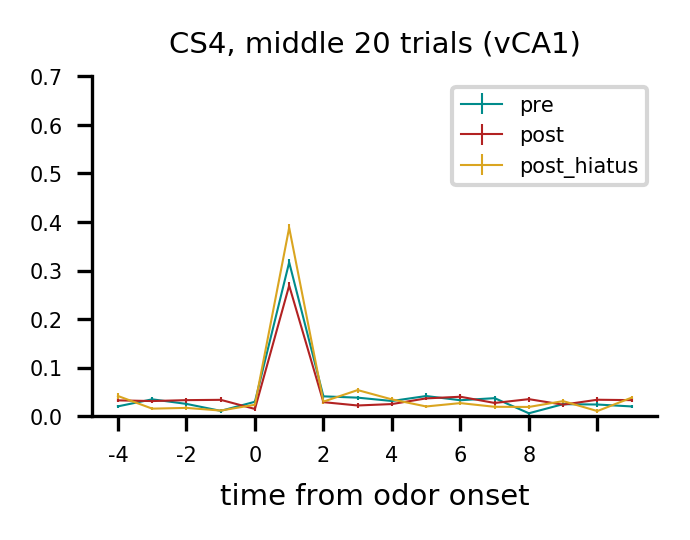

In [149]:
odor='CS4'
for sess,c in zip(sessions[1:],['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 20 trials (vCA1)"%odor)

In [9]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
